## App store strategy games rating

Dataset: 
<a href="https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games" target="_blank">17k Mobile Strategy Games</a>

Objectives: Apply decision tree and random forest with hyperparameters tuning using grid search and random search methods.

In [1]:
# Setup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# Load data
df = pd.read_csv("../test2/games_v1.csv")
df.head()

,title,URS,URC,price,paid,IAP,model,age_rating,size_mb,size_group,genre_new,good_URS,lang_num,lang_multi
0,Sudoku,4.0,3553,2.99,PAID,0,Paid,4+,15.854,1,Puzzle,1,17,1
1,Reversi,3.5,284,1.99,PAID,0,Paid,4+,12.329,1,Puzzle,0,1,0
2,Morocco,3.0,8376,0.00,FREE,0,Free,4+,0.675,1,Puzzle,0,1,0
3,Sudoku (Free),3.5,190394,0.00,FREE,0,Free,4+,21.552,1,Puzzle,0,17,1
4,Colony,2.5,125,0.99,PAID,0,Paid,4+,64.334,1,Puzzle,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       2315 non-null   object 
 1   URS         2315 non-null   float64
 2   URC         2315 non-null   int64  
 3   price       2315 non-null   float64
 4   paid        2315 non-null   object 
 5   IAP         2315 non-null   int64  
 6   model       2315 non-null   object 
 7   age_rating  2315 non-null   object 
 8   size_mb     2315 non-null   float64
 9   size_group  2315 non-null   int64  
 10  genre_new   2315 non-null   object 
 11  good_URS    2315 non-null   int64  
 12  lang_num    2315 non-null   int64  
 13  lang_multi  2315 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 253.3+ KB


In [4]:
#drop game title col
df.drop(['title'], axis="columns", inplace=True)

In [5]:
#category variables
for col in ['paid', 'IAP', 'model', 'age_rating','size_group','genre_new','good_URS','lang_multi']:
    df[col] = df[col].astype('category')
    
categorical_col = df.select_dtypes(exclude=['int', 'float']).columns
print(categorical_col)

Index(['paid', 'IAP', 'model', 'age_rating', 'size_group', 'genre_new',
       'good_URS', 'lang_multi'],
      dtype='object')


In [6]:
#numeric variables summary
pd.set_option("display.float_format", "{:.3f}".format)
df.describe()

,URS,URC,price,size_mb,lang_num
count,2315.000,2315.000,2315.000,2315.000,2315.000
mean,4.233,9533.878,0.785,204.471,5.150
std,0.543,75389.545,3.433,338.861,7.727
min,1.500,100.000,0.000,0.216,1.000
25%,4.000,233.000,0.000,50.123,1.000
50%,4.500,670.000,0.000,117.708,1.000
75%,4.500,3029.500,0.000,228.242,6.000
max,5.000,3032734.000,139.990,4005.591,111.000


In [7]:
#target 
df['good_URS'] = df.good_URS.astype("category").cat.codes
df.good_URS.value_counts()

1    1963
0     352
Name: good_URS, dtype: int64

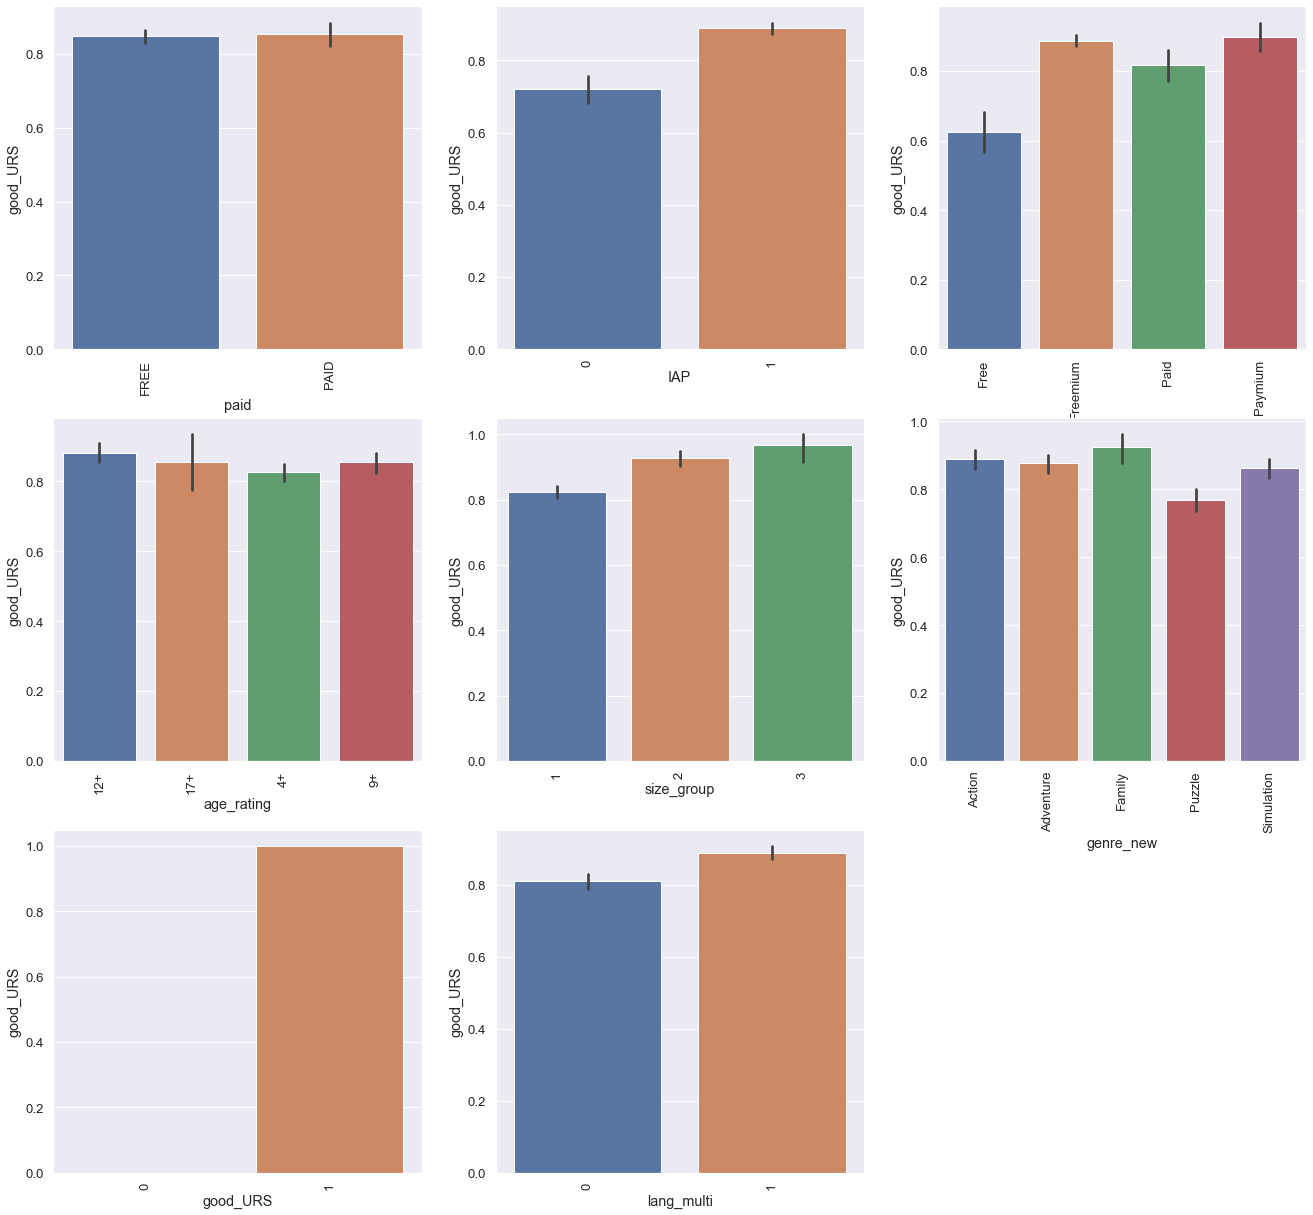

In [8]:
#visualise categorical features with target
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='good_URS', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('good_URS')
    plt.xlabel(f'{column}')

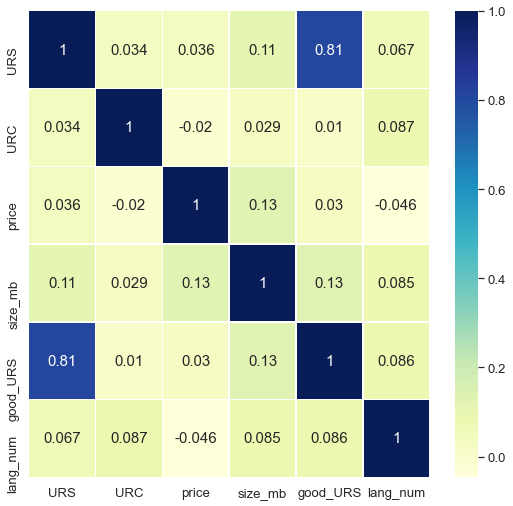

In [9]:
#correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":15},linewidths=.5)

In [11]:
#encode categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [12]:
num_features = ["URC","size_mb",]
cat_features = ["model","age_rating","genre_new", "IAP"]
features = num_features + cat_features
X = df.drop(["good_URS"], axis=1)[features]
y = df["good_URS"]

In [13]:
#evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [14]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision tree

In [15]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Test Result:
accuracy score: 0.8043165467625899

Classification Report: 
 	Precision: 0.8739495798319328
	Recall Score: 0.8950086058519794
	F1 score: 0.8843537414965986

Confusion Matrix: 
 [[ 39  75]
 [ 61 520]]



In [47]:
#decision tree with hyperparameter tuning using grid search method
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 10))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 10)), 
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed:    8.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [48]:
best_params = grid_search_cv.best_params_
tree = DecisionTreeClassifier(**best_params)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       splitter='random')

In [49]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8654

Classification Report: 
 	Precision: 0.8839050131926122
	Recall Score: 0.9696092619392185
	F1 score: 0.924775707384403

Confusion Matrix: 
 [[  62  176]
 [  42 1340]]

Test Result:
accuracy score: 0.823021582733813

Classification Report: 
 	Precision: 0.8523076923076923
	Recall Score: 0.9535283993115319
	F1 score: 0.9000812347684809

Confusion Matrix: 
 [[ 18  96]
 [ 27 554]]



### Random Forest

In [43]:
#random forest 
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[ 238    0]
 [   0 1382]]

Test Result:
accuracy score: 0.8388489208633093

Classification Report: 
 	Precision: 0.86697965571205
	Recall Score: 0.9535283993115319
	F1 score: 0.9081967213114753

Confusion Matrix: 
 [[ 29  85]
 [ 27 554]]



In [44]:
#RF with randomised search method
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [45]:
rf_best_params = rf_random.best_params_
rand_forest = RandomForestClassifier(**rf_best_params)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000)

In [46]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9210

Classification Report: 
 	Precision: 0.918
	Recall Score: 0.9963820549927641
	F1 score: 0.9555863983344899

Confusion Matrix: 
 [[ 115  123]
 [   5 1377]]

Test Result:
accuracy score: 0.8489208633093526

Classification Report: 
 	Precision: 0.8628048780487805
	Recall Score: 0.9741824440619621
	F1 score: 0.9151172190784155

Confusion Matrix: 
 [[ 24  90]
 [ 15 566]]



In [50]:
#RF with grid search method
param_grid = {'max_depth':[50, 60, 75], 
              'n_estimators':[1400, 1425, 1450],
              'max_features':['sqrt'],
              'min_samples_split':[4, 5, 6], 
              'min_samples_leaf':[1], 
              'bootstrap':[ False], 
              'criterion':["gini"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3)
grid_rand_forest.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [50, 60, 75], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [1400, 1425, 1450]},
             scoring='accuracy', verbose=1)

In [51]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9210

Classification Report: 
 	Precision: 0.918
	Recall Score: 0.9963820549927641
	F1 score: 0.9555863983344899

Confusion Matrix: 
 [[ 115  123]
 [   5 1377]]

Test Result:
accuracy score: 0.8489208633093526

Classification Report: 
 	Precision: 0.8628048780487805
	Recall Score: 0.9741824440619621
	F1 score: 0.9151172190784155

Confusion Matrix: 
 [[ 24  90]
 [ 15 566]]

